<a href="https://colab.research.google.com/github/mtomcanyi/colab-public/blob/main/GitHubIntegration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GitHub Integration Essentials

## Code and data split
Code can be stored on GitHub and data can be stored on Google Drive. One time token authorization is needed for the duration of the session.

Root of the drive is mounted at `/content/drive/MyDrive`

In [143]:
from google.colab import drive

drive.mount('/content/drive');
drivePfx = '/content/drive/MyDrive'

Mounted at /content/drive


## Package versions
Quick dump of Python and package versions available in Colab

In [139]:
! python -V

for package in ['numpy','pandas','matplotlib','sklearn','bs4','requests']:
  ! echo "-----------------------"
  ! pip show $package

Python 3.7.12
-----------------------
Name: numpy
Version: 1.19.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: yellowbrick, xgboost, xarray, wordcloud, torchvision, torchtext, tifffile, thinc, Theano-PyMC, tensorflow, tensorflow-probability, tensorflow-hub, tensorflow-datasets, tensorboard, tables, statsmodels, spacy, sklearn-pandas, seaborn, scs, scipy, scikit-learn, resampy, qdldl, PyWavelets, python-louvain, pystan, pysndfile, pymc3, pyerfa, pyemd, pyarrow, plotnine, patsy, pandas, osqp, opt-einsum, opencv-python, opencv-contrib-python, numexpr, numba, nibabel, netCDF4, moviepy, mlxtend, mizani, missingno, matplotlib, matplotlib-venn, lightgbm, librosa, Keras-Preprocessing, kapre, jpeg4py, jaxlib, jax, imgaug, imbalanced-learn, imageio, hyperopt, holoviews, h5py, gym, gensim, folium, 

## Package installation
Running installation via terminal command


In [140]:
# BeautifulSoup web scraping stack already installed

#!pip install bs4
#!pip install requests

## Imports and setup
Package imports needed for cells below

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Make visualizations bigger and better looking - credits to Julia Evans(@b0rk)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,5)

## Test data



*   Originates from [Prague Water and Sewage Services](https://www.pvk.cz/vse-o-vode/cena-vodneho-a-stocneho/vyvoj-vodneho-a-stocneho-v-praze/)
*   Table entry: *Od roku 1998 sjednoceno*
*   In *Obdobi* (en: *Period*) kept only starting year
*   Renamed columns to `Year, Water, Sewer`
*   Saved resulting CSV onto `MyDrive/Hackhealth2021/WaterSewerPrague.csv`
*   Saved same CSV as Google Sheet `WaterSewer`



## Read and preview a file stored on mounted drive
Drive gets mounted at root with all subdirectories available



In [141]:
wsDF = pd.read_csv(f'{drivePfx}/Hackhealth2021/WaterSewerPrague.csv', index_col='Year')
wsDF

,Water,Sewer,Total
Year,,,
2000,18.64,13.99,32.63
2001,19.77,15.33,35.10
2002,20.65,17.12,37.77
2003,20.72,17.85,38.57
2004,21.95,19.48,41.43
2005,22.79,19.96,42.75
2006,23.51,20.85,44.36
2007,26.74,22.93,49.67
2008,27.76,23.81,51.57


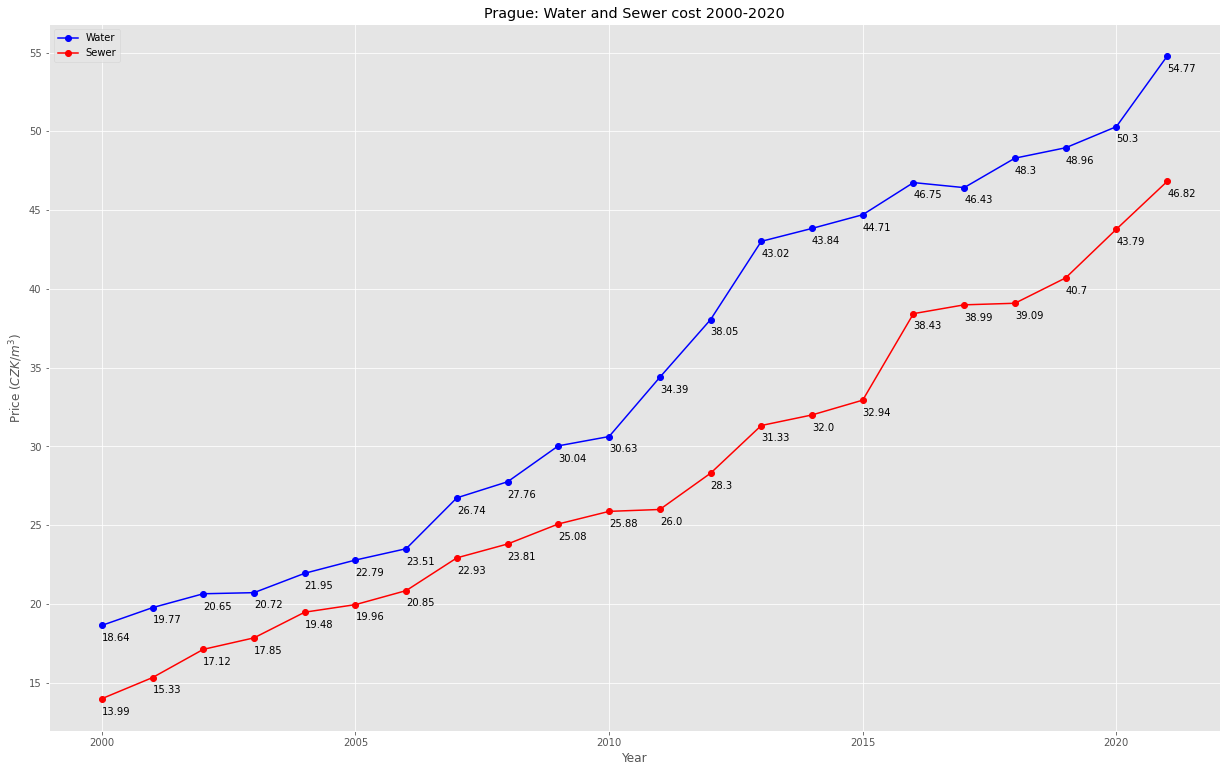

In [109]:
# Long form. Year is an index
# plt.plot(wsDF.index,wsDF['Water'],'bo-',wsDF.index,wsDF['Sewer'],'ro-');

ax = plt.plot(wsDF['Water'],'bo-',wsDF['Sewer'],'ro-');

plt.title('Prague: Water and Sewer cost 2000-2020')
plt.xlabel('Year')
plt.ylabel(r'Price ($CZK/m^3)$')
plt.rcParams['figure.figsize'] = (21,13)
plt.legend(['Water','Sewer'])

for rowIdx,rowData in wsDF.iterrows():
  ax[0].axes.text(rowIdx,rowData['Water']-1,rowData['Water'])
  ax[1].axes.text(rowIdx,rowData['Sewer']-1,rowData['Sewer'])


## Write data to a file on drive

In [126]:
# Boolean indexing does not return copy by default
wsFiveYearDF=wsDF[wsDF.index % 5 == 0].copy()
wsFiveYearDF['WaterIncreasePct'] = wsFiveYearDF['Water'].pct_change()*100
wsFiveYearDF['SewerIncreasePct'] = wsFiveYearDF['Sewer'].pct_change()*100

wsFiveYearDF['WaterIncreasePct'] = wsFiveYearDF['WaterIncreasePct'].round(2)
wsFiveYearDF['SewerIncreasePct'] = wsFiveYearDF['SewerIncreasePct'].round(2)

wsFiveYearDF
wsFiveYearDF.to_csv(f'{drivePfx}/Hackhealth2021/PriceIncrease.csv')


## Flush and unmount drive

In [142]:
# Uncomment to flush and unmount the drive
# drive.flush_and_unmount()

## Access data in Google Sheets

In [137]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

from pprint import pprint

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('WaterSewer').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print('-------------[ Row dump ]--------------')
pprint(rows[:5])
print('---------------------------------------')

# First row contains column names
headerRow = rows.pop(0)


# Convert to a DataFrame and render.
sheetDF = pd.DataFrame.from_records(rows,columns=headerRow,index='Year')
sheetDF

-------------[ Row dump ]--------------
[['Year', 'Water', 'Sewer', 'Total'],
 ['2000', '18.64', '13.99', '32.63'],
 ['2001', '19.77', '15.33', '35.1'],
 ['2002', '20.65', '17.12', '37.77'],
 ['2003', '20.72', '17.85', '38.57']]
---------------------------------------


,Water,Sewer,Total
Year,,,
2000,18.64,13.99,32.63
2001,19.77,15.33,35.1
2002,20.65,17.12,37.77
2003,20.72,17.85,38.57
2004,21.95,19.48,41.43
2005,22.79,19.96,42.75
2006,23.51,20.85,44.36
2007,26.74,22.93,49.67
2008,27.76,23.81,51.57
